In [0]:
!pip install torch torchvision==0.2.1

     |████████████████████████████████| 61kB 2.4MB/s 
  Found existing installation: torchvision 0.3.0
    Uninstalling torchvision-0.3.0:
      Successfully uninstalled torchvision-0.3.0


In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cd /content/gdrive/"My Drive"/"Colab Notebooks"

/content/gdrive/My Drive/Colab Notebooks


In [0]:
x = torch.rand(3,2)

In [0]:
y = torch.ones(x.size())

In [0]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),])

trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

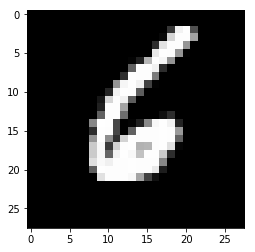

In [0]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [0]:
images[1].numpy().squeeze().shape

(28, 28)

In [0]:
from torch import nn, optim
import torch.nn.functional as F

In [0]:
class DigitRecognizer(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)
    
    
  def forward(self, x):
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.softmax(x, dim = 1)
    
    return x
  

model = DigitRecognizer()
model = model.cuda()

In [0]:
images, labels = next(iter(trainloader))
images = images.cuda()

In [0]:
images[1].cpu().shape

torch.Size([1, 28, 28])

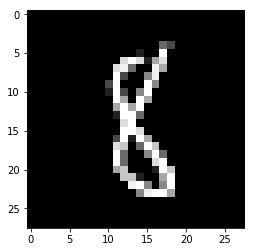

In [0]:
plt.imshow(images[1].cpu().numpy().squeeze(), cmap='Greys_r')

<BarContainer object of 10 artists>

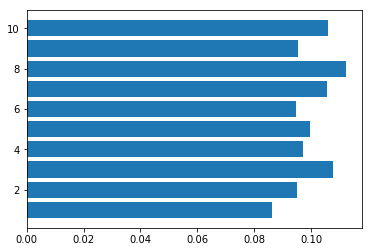

In [0]:
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0])

plt.barh([_ for _ in range(1,11)], width = ps.detach().cpu().numpy().squeeze(), align='center')

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [0]:
print(f'Model Weights : {model.fc1.weight}')

Model Weights : Parameter containing:
tensor([[ 0.0341, -0.0217,  0.0267,  ..., -0.0160, -0.0343,  0.0081],
        [-0.0166,  0.0175,  0.0148,  ...,  0.0055, -0.0339, -0.0122],
        [-0.0111,  0.0339,  0.0124,  ...,  0.0051,  0.0124, -0.0225],
        ...,
        [ 0.0310, -0.0283, -0.0183,  ...,  0.0217, -0.0291,  0.0174],
        [-0.0215,  0.0263,  0.0311,  ..., -0.0005,  0.0199,  0.0272],
        [ 0.0094,  0.0356,  0.0146,  ...,  0.0185, -0.0178,  0.0073]],
       device='cuda:0', requires_grad=True)


In [0]:
images, labels = next(iter(trainloader))
images.resize_(64, 784)

optimizer.zero_grad()

output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print(f'Gradient : {model.fc1.weight.grad}')
optimizer.step()

In [0]:
print(f'Model Weights : {model.fc1.weight}')

In [0]:
print_every = 1000
epochs = 10
step = 0
for epoch in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    cuda_images = images.cuda()
    cuda_labels = labels.cuda()
    step += 1
    cuda_images.resize_(images.shape[0], 784)
    
    optimizer.zero_grad()
    output = model.forward(cuda_images)
    loss = criterion(output, cuda_labels)
    
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    if step % print_every == 0:
      print(f'Epoch : {epoch + 1} => Step : {step} => Training Loss => {running_loss/print_every:.4f}')
      running_loss = 0

Epoch : 2 => Step : 1000 => Training Loss => 0.0960
Epoch : 3 => Step : 2000 => Training Loss => 0.1914
Epoch : 4 => Step : 3000 => Training Loss => 0.2865
Epoch : 5 => Step : 4000 => Training Loss => 0.3813
Epoch : 6 => Step : 5000 => Training Loss => 0.4768
Epoch : 7 => Step : 6000 => Training Loss => 0.5720
Epoch : 8 => Step : 7000 => Training Loss => 0.6677
Epoch : 9 => Step : 8000 => Training Loss => 0.7623
Epoch : 10 => Step : 9000 => Training Loss => 0.8571


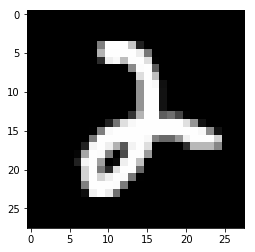

In [0]:
images, labels = next(iter(trainloader))
image = images[0]
cuda_image = image.cuda()

cuda_image.resize_(1, 784)
with torch.no_grad():
  logits = model.forward(cuda_image)

ps = F.softmax(logits, dim = 0)  
plt.imshow(image.numpy().squeeze(), cmap='Greys_r')


<BarContainer object of 10 artists>

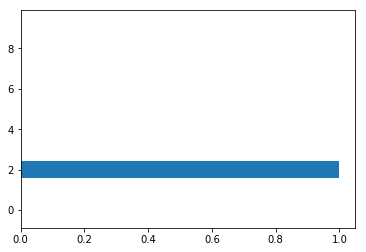

In [0]:
plt.barh([_ for _ in range(0,10)], width = logits.detach().cpu().numpy().squeeze(), align='center')